# Beyond the Likes: Streaming Secrets Behind Ghana’s Digital Obsession — Who’s Watching, When, and Why

![picture](https://environics.ca/wp-content/uploads/2024/07/feature-image-cropped.png)

## Business Problem

*Despite the explosive growth of social media usage across Ghana, many digital platforms and advertisers still rely on generalized strategies that* *ignore the nuanced preferences, behaviors, and engagement patterns of users across different demographics. There is a growing need to understand not* *just who uses social media, but how, when, and why they engage with specific platforms. Without this knowledge, businesses risk wasting resources on* *poorly targeted content, and platforms risk failing to adapt to the needs of their core users — especially across rural vs urban divides, age groups,* *and device types.*

## Research Objectives

- *Which platforms are most popular across different age groups?*

- *How does video content category affect satisfaction?*

- *What is the total engagement level by profession?*

- *How does marital status influence platform preference among social media users?*

- *What is the level of income distribution by social media users across platforms?*

- *What motivates users to watch content on different social media platform, and how do these reasons vary across platforms?*
    
- *How does user engagement vary across different demographic groups and social media platforms?*

- *How does time spent on video relate to engagement score?*


# Group Members
*Charis Afi Lassey*

*Abigail Princess Nyala*

*Mildred Mawunyo Dzre*

*Goodness Fiifi Quainoo*

*Emmanuel Ogechukwu Mba*


In [7]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Loading the Dataset
clean = pd.read_csv("social_media_project.csv")

In [11]:
#Checking the first five rows
clean.head()

,userid,age,Gender,Income,profession,Demographics,Platform,Total Time Spent,video category,Video Length,...,Number Of Videos Watched,Frequency,Satisfaction,Watch Reason,Devicetype,Watch Time,Addiction Level,currentactivity,Favorite Day Of The Week,marital status
0,1,56,Male,82812,Engineer,Rural,Instagram,80,Pranks,24,...,22,Night,7,Procrastination,Smartphone,9:00 PM,5,Commuting,Sunday,Complicated
1,2,46,Female,27999,Artist,Urban,Instagram,228,Pranks,19,...,31,Afternoon,5,Habit,Computer,5:00 PM,3,At school,Tuesday,Complicated
2,3,32,Female,42436,Engineer,Rural,Facebook,30,Vlogs,19,...,7,Evening,4,Entertainment,Tablet,2:00 PM,2,At home,Thursday,Divorced
3,4,60,Male,62963,Waiting staff,Rural,YouTube,101,Vlogs,4,...,41,Night,7,Habit,Smartphone,9:00 PM,5,Commuting,Tuesday,nan
4,5,25,Male,22096,Manager,Urban,TikTok,136,Gaming,19,...,21,Morning,2,Boredom,Smartphone,8:00 AM,0,At home,Saturday,Divorced


In [13]:
#Checking the last five rows
clean.tail()

,userid,age,Gender,Income,profession,Demographics,Platform,Total Time Spent,video category,Video Length,...,Number Of Videos Watched,Frequency,Satisfaction,Watch Reason,Devicetype,Watch Time,Addiction Level,currentactivity,Favorite Day Of The Week,marital status
1045,278,41,Other,75267,Labor/Worker,Rural,Instagram,163,Vlogs,20,...,1,nan,5,Entertainment,Tablet,6:05 PM,3,Commuting,Wednesday,Married
1046,925,57,Other,81610,driver,Rural,Instagram,46,Pranks,1,...,18,Night,2,Entertainment,Smartphone,10:15 PM,0,At home,Monday,nan
1047,602,27,Male,91155,Cashier,Rural,TikTok,62,Life Hacks,19,...,12,Morning,3,Boredom,Computer,9:55 AM,1,At home,Sunday,Divorced
1048,440,64,Male,64602,Cashier,Rural,YouTube,77,Jokes/Memes,22,...,49,Night,8,Entertainment,Smartphone,11:30 PM,6,At school,Friday,Divorced
1049,838,49,Other,52402,Students,Rural,Facebook,99,Jokes/Memes,18,...,35,Evening,7,Habit,Computer,2:00 PM,5,At work,Thursday,Married


In [15]:
#Checking the shape of the dataset
clean.shape

(1050, 22)

_This dataset has 1,050 rows and 22 columns_

In [18]:
#Columns of the dataset
clean.columns

Index(['userid', 'age', '  Gender  ', '  Income  ', 'profession',
       '  Demographics  ', '  Platform  ', '  Total Time Spent  ',
       'video category', '  Video Length  ', '  Engagement  ',
       'time spent on video', '  Number Of Videos Watched  ', '  Frequency  ',
       '  Satisfaction  ', '  Watch Reason  ', '  Devicetype  ',
       '  Watch Time  ', '  Addiction Level  ', 'currentactivity',
       '  Favorite Day Of The Week  ', 'marital status'],
      dtype='object')

In [20]:
#Brief info on the dataset
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   userid                        1050 non-null   int64  
 1   age                           1050 non-null   int64  
 2     Gender                      1050 non-null   object 
 3     Income                      1050 non-null   int64  
 4   profession                    1050 non-null   object 
 5     Demographics                1050 non-null   object 
 6     Platform                    1050 non-null   object 
 7     Total Time Spent            1050 non-null   int64  
 8   video category                1050 non-null   object 
 9     Video Length                1050 non-null   int64  
 10    Engagement                  945 non-null    float64
 11  time spent on video           1050 non-null   int64  
 12    Number Of Videos Watched    1050 non-null   int64  
 13    F

# DATA CLEANING

In [23]:
#removing excess spaces from column names
clean.columns = clean.columns.str.strip()

In [25]:
#checking to see the affected change 
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   userid                    1050 non-null   int64  
 1   age                       1050 non-null   int64  
 2   Gender                    1050 non-null   object 
 3   Income                    1050 non-null   int64  
 4   profession                1050 non-null   object 
 5   Demographics              1050 non-null   object 
 6   Platform                  1050 non-null   object 
 7   Total Time Spent          1050 non-null   int64  
 8   video category            1050 non-null   object 
 9   Video Length              1050 non-null   int64  
 10  Engagement                945 non-null    float64
 11  time spent on video       1050 non-null   int64  
 12  Number Of Videos Watched  1050 non-null   int64  
 13  Frequency                 1050 non-null   object 
 14  Satisfac

In [27]:
#Checking for duplicate entries
clean[clean.duplicated()]

,userid,age,Gender,Income,profession,Demographics,Platform,Total Time Spent,video category,Video Length,...,Number Of Videos Watched,Frequency,Satisfaction,Watch Reason,Devicetype,Watch Time,Addiction Level,currentactivity,Favorite Day Of The Week,marital status
1000,522,25,Other,92982,Labor/Worker,Rural,YouTube,78,Life Hacks,23,...,30,Evening,3,Entertainment,Smartphone,3:55 PM,1,At school,Sunday,Complicated
1001,738,38,Female,88899,Students,Rural,Instagram,73,Gaming,17,...,6,Afternoon,7,Boredom,Computer,5:00 PM,5,At home,Tuesday,Single
1002,741,34,Female,62727,Students,Rural,Instagram,161,ASMR,20,...,38,Evening,1,Entertainment,Smartphone,2:00 PM,0,At home,Saturday,Complicated
1003,661,38,Female,36859,Waiting staff,Rural,TikTok,251,Vlogs,3,...,47,Night,9,Habit,Tablet,10:15 PM,7,At work,Friday,Divorced
1004,412,61,Male,62604,Students,Urban,YouTube,159,Vlogs,8,...,24,nan,2,Entertainment,Smartphone,7:45 AM,0,At home,Sunday,nan
1005,679,40,Female,48064,Artist,nan,YouTube,282,Pranks,6,...,30,Morning,3,Boredom,Smartphone,9:55 AM,1,At school,Wednesday,Single
1006,627,21,Male,50654,Waiting staff,Rural,YouTube,216,Trends,24,...,19,Evening,5,Procrastination,Tablet,4:25 PM,3,At work,Friday,Complicated
1007,514,29,Female,68438,Labor/Worker,Urban,Instagram,38,Vlogs,18,...,46,Night,8,Entertainment,Smartphone,11:30 PM,6,At home,Monday,Married
1008,860,43,Other,36211,Students,nan,Facebook,247,Vlogs,7,...,48,Evening,2,Habit,Smartphone,2:00 PM,0,At home,Thursday,Divorced
1009,137,43,Female,59961,Cashier,Rural,Instagram,205,Trends,27,...,37,Night,7,Boredom,Smartphone,9:00 PM,5,At home,Saturday,Complicated


In [28]:
#Finding the total number of duplicates
clean.duplicated().sum()

50

_There are 50 duplicates in our dataset_

In [32]:
#Dropping duplicates
clean.drop_duplicates(inplace=True)

In [34]:
#Resetting the index
clean.reset_index(drop=True)

,userid,age,Gender,Income,profession,Demographics,Platform,Total Time Spent,video category,Video Length,...,Number Of Videos Watched,Frequency,Satisfaction,Watch Reason,Devicetype,Watch Time,Addiction Level,currentactivity,Favorite Day Of The Week,marital status
0,1,56,Male,82812,Engineer,Rural,Instagram,80,Pranks,24,...,22,Night,7,Procrastination,Smartphone,9:00 PM,5,Commuting,Sunday,Complicated
1,2,46,Female,27999,Artist,Urban,Instagram,228,Pranks,19,...,31,Afternoon,5,Habit,Computer,5:00 PM,3,At school,Tuesday,Complicated
2,3,32,Female,42436,Engineer,Rural,Facebook,30,Vlogs,19,...,7,Evening,4,Entertainment,Tablet,2:00 PM,2,At home,Thursday,Divorced
3,4,60,Male,62963,Waiting staff,Rural,YouTube,101,Vlogs,4,...,41,Night,7,Habit,Smartphone,9:00 PM,5,Commuting,Tuesday,nan
4,5,25,Male,22096,Manager,Urban,TikTok,136,Gaming,19,...,21,Morning,2,Boredom,Smartphone,8:00 AM,0,At home,Saturday,Divorced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,74254,Students,Rural,TikTok,144,Gaming,1,...,17,Afternoon,1,Procrastination,Smartphone,5:45 PM,0,At work,Friday,Divorced
996,997,40,Female,27006,Waiting staff,Urban,Facebook,231,Life Hacks,2,...,17,Night,2,Boredom,Smartphone,10:15 PM,0,At home,Sunday,Single
997,998,27,Male,94218,Waiting staff,Rural,TikTok,165,Pranks,12,...,28,Night,1,Procrastination,Smartphone,10:15 PM,0,Commuting,Monday,Complicated
998,999,61,Male,85344,Students,Urban,YouTube,151,Life Hacks,15,...,30,nan,7,nan,Smartphone,10:15 PM,5,At work,Wednesday,Married


In [36]:
#checking to see the effected change
clean.shape

(1000, 22)

In [37]:
#renaming our columns
clean.rename({"Total Time Spent":"total_time_spent"}, axis =1, inplace = True)
clean.rename({"number of sessions":"number_of_sessions"}, axis =1, inplace = True)
clean.rename({"video category":"video_category"}, axis =1, inplace = True)
clean.rename({"Video Length":"video_length"}, axis =1, inplace = True)
clean.rename({"time spent on video":"time_spent_on_video"}, axis =1, inplace = True)
clean.rename({"Number Of Videos Watched":"number_of_videos_watched"}, axis =1, inplace = True)
clean.rename({"Watch Reason":"watch_reason"}, axis =1, inplace = True)
clean.rename({"Devicetype":"device_type"}, axis =1, inplace = True)
clean.rename({"Watch Time":"watch_time"}, axis =1, inplace = True)
clean.rename({"Addiction Level":"addiction_level"}, axis =1, inplace = True)
clean.rename({"currentactivity":"current_activity"}, axis =1, inplace = True)
clean.rename({"Favorite Day Of The Week":"day_of_the_week"}, axis =1, inplace = True)
clean.rename({"marital status":"marital_status"}, axis =1, inplace = True)
clean.rename({"userid":"user_id"}, axis =1, inplace = True)
clean.rename({"Gender":"gender"}, axis =1, inplace = True)
clean.rename({"Demographics":"demographics"}, axis =1, inplace = True)
clean.rename({"Income":"income"}, axis =1, inplace = True)
clean.rename({"Platform":"platform"}, axis =1, inplace = True)
clean.rename({"Frequency":"frequency"}, axis =1, inplace = True)
clean.rename({"Satisfaction":"satisfaction"}, axis =1, inplace = True)
clean.rename({"Engagement":"engagement"}, axis =1, inplace = True)

In [38]:
#checking data types
clean.dtypes

user_id                       int64
age                           int64
gender                       object
income                        int64
profession                   object
demographics                 object
platform                     object
total_time_spent              int64
video_category               object
video_length                  int64
engagement                  float64
time_spent_on_video           int64
number_of_videos_watched      int64
frequency                    object
satisfaction                  int64
watch_reason                 object
device_type                  object
watch_time                   object
addiction_level               int64
current_activity             object
day_of_the_week              object
marital_status               object
dtype: object

In [39]:
#changing data types 
clean["gender"] = clean["gender"].astype("category")
clean["demographics"] = clean["demographics"].astype("category")
clean["platform"] = clean["platform"].astype("category")
clean["frequency"] = clean["frequency"].astype("category")
clean["watch_reason"] = clean["watch_reason"].astype("category")
clean["device_type"] = clean["device_type"].astype("category")
clean["marital_status"] = clean["marital_status"].astype("category")
clean["user_id"] = clean["user_id"].astype("object")
clean["profession"] = clean["profession"].astype("object")
clean["age"] = clean["age"].astype("object")
clean["satisfaction"] = clean["satisfaction"].astype("object")
clean["addiction_level"] = clean["addiction_level"].astype("object")
clean["engagement"] = clean["engagement"].astype("object")


In [40]:
#checking to see the effected change
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   user_id                   1000 non-null   object  
 1   age                       1000 non-null   object  
 2   gender                    1000 non-null   category
 3   income                    1000 non-null   int64   
 4   profession                1000 non-null   object  
 5   demographics              1000 non-null   category
 6   platform                  1000 non-null   category
 7   total_time_spent          1000 non-null   int64   
 8   video_category            1000 non-null   object  
 9   video_length              1000 non-null   int64   
 10  engagement                900 non-null    object  
 11  time_spent_on_video       1000 non-null   int64   
 12  number_of_videos_watched  1000 non-null   int64   
 13  frequency                 1000 non-null   category
 14

In [45]:
#checking the total number of null values
clean.isnull().sum()

user_id                       0
age                           0
gender                        0
income                        0
profession                    0
demographics                  0
platform                      0
total_time_spent              0
video_category                0
video_length                  0
engagement                  100
time_spent_on_video           0
number_of_videos_watched      0
frequency                     0
satisfaction                  0
watch_reason                  0
device_type                   0
watch_time                    0
addiction_level               0
current_activity              0
day_of_the_week               0
marital_status                0
dtype: int64

In [46]:
# replacing empty spaces in the Engagement column with the mean

# Calculate the mean and round it to the nearest whole number
engagement_mean = round(clean['engagement'].mean())

# Fill missing values in 'Engagement' with the rounded mean
clean['engagement'].fillna(engagement_mean, inplace=True)


In [48]:
# Check number of missing values after
print(clean['engagement'].isnull().sum())

0


In [51]:
#cleaning gender
clean['gender'] = clean['gender'].replace('  Male  ', 'Male')
clean['gender'] = clean['gender'].replace('  Female  ', 'Female')
clean['gender'] = clean['gender'].replace('  Other  ', 'Other')

clean['gender'].unique()


['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

In [54]:
#cleaning profession
clean['profession'] = clean['profession'].replace('  Engineer  ', 'Engineer')
clean['profession'] = clean['profession'].replace('  Artist  ','Artist')
clean['profession'] = clean['profession'].replace('  Waiting staff  ', 'Waiting staff')
clean['profession'] = clean['profession'].replace('  Manager  ', 'Manager')
clean['profession'] = clean['profession'].replace('  driver  ', 'Driver')
clean['profession'] = clean['profession'].replace('  Students  ', 'Students')
clean['profession'] = clean['profession'].replace('  Labor/Worker  ', 'Labour/Worker')
clean['profession'] = clean['profession'].replace('  Cashier  ', 'Cashier')
clean['profession'] = clean['profession'].replace('  Teacher  ', 'Teacher')

clean['profession'].unique()

array(['Engineer', 'Artist', 'Waiting staff', 'Manager', 'Driver',
       'Students', 'Labour/Worker', 'Cashier', 'Teacher'], dtype=object)

In [55]:
#cleaning demographics
clean['demographics'] = clean['demographics'].replace('  Rural  ', 'Rural')
clean['demographics'] = clean['demographics'].replace('  Urban  ', 'Urban')
clean['demographics'] = clean['demographics'].replace('  nan  ', 'Other')

clean['demographics'].unique()

['Rural', 'Urban', 'Other']
Categories (3, object): ['Rural', 'Urban', 'Other']

In [56]:
#cleaning video_category
clean['video_category'] = clean['video_category'].replace('  Pranks  ', 'Pranks')
clean['video_category'] = clean['video_category'].replace('  Vlogs  ', 'Vlogs')
clean['video_category'] = clean['video_category'].replace('  Gaming  ', 'Gaming')
clean['video_category'] = clean['video_category'].replace('  Jokes/Memes  ', 'Jokes/Memes')
clean['video_category'] = clean['video_category'].replace('  Entertainment  ', 'Entertainment')
clean['video_category'] = clean['video_category'].replace('  ASMR  ', 'ASMR')
clean['video_category'] = clean['video_category'].replace('  Life Hacks  ', 'Life Hacks')
clean['video_category'] = clean['video_category'].replace('  Trends  ', 'Trends')
clean['video_category'] = clean['video_category'].replace('  Comedy  ', 'Comedy')

clean['video_category'].unique()

array(['Pranks', 'Vlogs', 'Gaming', 'Jokes/Memes', 'Entertainment',
       'ASMR', 'Life Hacks', 'Trends', 'Comedy'], dtype=object)

In [57]:
#cleaning frequency
clean['frequency'] = clean['frequency'].replace('  Night  ', 'Night')
clean['frequency'] = clean['frequency'].replace('  Afternoon  ', 'Afternoon')
clean['frequency'] = clean['frequency'].replace('  Evening  ', 'Evening')
clean['frequency'] = clean['frequency'].replace('  Morning  ', 'Morning')
clean['frequency'] = clean['frequency'].replace('  nan  ', 'Dawn')

clean['frequency'].unique()

['Night', 'Afternoon', 'Evening', 'Morning', 'Dawn']
Categories (5, object): ['Afternoon', 'Evening', 'Morning', 'Night', 'Dawn']

In [58]:
#cleaning watch_reason
clean['watch_reason'] = clean['watch_reason'].replace('  Procrastination  ', 'Procrastination')
clean['watch_reason'] = clean['watch_reason'].replace('  Habit  ', 'Habit')
clean['watch_reason'] = clean['watch_reason'].replace('  Entertainment  ', 'Entertainment')
clean['watch_reason'] = clean['watch_reason'].replace('  Boredom  ', 'Boredom')
clean['watch_reason'] = clean['watch_reason'].replace('  nan  ', 'Other')

clean['watch_reason'].unique()


['Procrastination', 'Habit', 'Entertainment', 'Boredom', 'Other']
Categories (5, object): ['Boredom', 'Entertainment', 'Habit', 'Procrastination', 'Other']

In [59]:
#cleaning device_type
clean['device_type'] = clean['device_type'].replace('  Smartphone  ', 'Smartphone')
clean['device_type'] = clean['device_type'].replace('  Computer  ', 'Computer')
clean['device_type'] = clean['device_type'].replace('  Tablet  ', 'Tablet')

clean['device_type'].unique()

['Smartphone', 'Computer', 'Tablet']
Categories (3, object): ['Computer', 'Smartphone', 'Tablet']

In [60]:
#cleaning current_activity
clean['current_activity'] = clean['current_activity'].replace('  Commuting  ', 'Commuting')
clean['current_activity'] = clean['current_activity'].replace('  At school  ', 'At school')
clean['current_activity'] = clean['current_activity'].replace('  At home  ', 'At home')
clean['current_activity'] = clean['current_activity'].replace('  At work  ', 'At work')

clean['current_activity'].unique()

array(['Commuting', 'At school', 'At home', 'At work'], dtype=object)

In [61]:
#cleaning day_of_the_week
clean['day_of_the_week'] = clean['day_of_the_week'].replace('At work', 'Sunday')
clean['day_of_the_week'] = clean['day_of_the_week'].replace('  Tuesday  ', 'Tuesday')
clean['day_of_the_week'] = clean['day_of_the_week'].replace('  Thursday  ', 'Thursday')
clean['day_of_the_week'] = clean['day_of_the_week'].replace('  Saturday  ', 'Saturday')
clean['day_of_the_week'] = clean['day_of_the_week'].replace('  Friday  ', 'Friday')
clean['day_of_the_week'] = clean['day_of_the_week'].replace('  Monday  ', 'Monday')
clean['day_of_the_week'] = clean['day_of_the_week'].replace('  Wednesday  ', 'Wednesday')

clean['day_of_the_week'].unique()


array(['  Sunday  ', 'Tuesday', 'Thursday', 'Saturday', 'Friday',
       'Monday', 'Wednesday'], dtype=object)

In [62]:
#cleaning watch_time
clean['watch_time'] = clean['watch_time'].replace('  9:00 PM  ', '9:00PM')
clean['watch_time'] = clean['watch_time'].replace('  5:00 PM  ', '5:00PM')
clean['watch_time'] = clean['watch_time'].replace('  2:00 PM  ', '2:00PM')
clean['watch_time'] = clean['watch_time'].replace('  8:00 AM  ', '8:00PM')
clean['watch_time'] = clean['watch_time'].replace('  8:30 PM  ', '8:30PM')
clean['watch_time'] = clean['watch_time'].replace('  3:45 PM  ', '3:45PM')
clean['watch_time'] = clean['watch_time'].replace('  6:05 PM  ', '6:05PM')
clean['watch_time'] = clean['watch_time'].replace('  9:15 AM  ', '9:15PM')
clean['watch_time'] = clean['watch_time'].replace('  7:45 AM  ', '7:45PM')
clean['watch_time'] = clean['watch_time'].replace('  7:25 PM  ', '7:25PM')
clean['watch_time'] = clean['watch_time'].replace('  3:55 PM  ', '3:55PM')
clean['watch_time'] = clean['watch_time'].replace('  11:30 PM  ', '11:30PM')
clean['watch_time'] = clean['watch_time'].replace('  10:15 PM  ', '10:15PM')
clean['watch_time'] = clean['watch_time'].replace('  9:55 AM  ', '9:55AM')
clean['watch_time'] = clean['watch_time'].replace('  4:25 PM  ', '4:25PM')
clean['watch_time'] = clean['watch_time'].replace('  5:45 PM  ', '5:45PM')

clean['watch_time'].unique()

array(['9:00PM', '5:00PM', '2:00PM', '8:00PM', '8:30PM', '3:45PM',
       '6:05PM', '9:15PM', '7:45PM', '7:25PM', '3:55PM', '11:30PM',
       '10:15PM', '9:55AM', '4:25PM', '5:45PM'], dtype=object)

In [63]:
#replacing nan with other and removing excess spaces from unique values
clean['marital_status'] = clean['marital_status'].replace('  nan  ', 'Other')
clean['marital_status'] = clean['marital_status'].replace('  Complicated  ', 'Complicated')
clean['marital_status'] = clean['marital_status'].replace('  Divorced  ', 'Divorced')
clean['marital_status'] = clean['marital_status'].replace('  Married  ', 'Married')
clean['marital_status'] = clean['marital_status'].replace('  Single  ', 'Single')

clean["marital_status"].unique()

['Complicated', 'Divorced', 'Other', 'Married', 'Single']
Categories (5, object): ['Complicated', 'Divorced', 'Married', 'Single', 'Other']

# EXPLORATORY DATA ANALYSIS

In [65]:
#finding the average income of a user grouping them by their gender
avg_income_gender = clean.groupby("gender")["income"].mean()

In [67]:
#viewing the results
avg_income_gender

gender
Female    59248.956522
Male      58659.396887
Other     62775.115854
Name: income, dtype: float64

In [74]:
#tabulating the results
avg_income_gender = avg_income_gender.to_frame()

In [76]:
#viewing the results
avg_income_gender

,income
gender,
Female,59248.956522
Male,58659.396887
Other,62775.115854


In [78]:
#sorting the results in ascending order
avg_income_gender.sort_values(by="income",inplace=True)

In [79]:
#viewing the results
avg_income_gender

,income
gender,
Male,58659.396887
Female,59248.956522
Other,62775.115854


In [87]:
#viewing the indexes
avg_income_gender.index

CategoricalIndex(['Male', 'Female', 'Other'], categories=['Female', 'Male', 'Other'], ordered=False, dtype='category', name='gender')

# VISUALIZATION

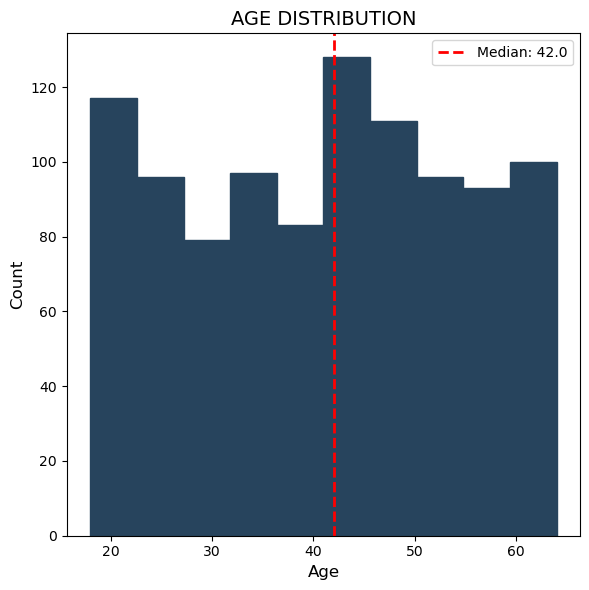

In [89]:
#Finding our age distribution
plt.figure(figsize=(6, 6))
colors = ['#27445D']

counts, bins, patches = plt.hist(x=clean["age"], bins=10, color=colors, edgecolor='#27445D')

median_age = clean["age"].median()
plt.axvline(median_age, color='r', linestyle='--', linewidth=2, label=f'Median: {median_age}')

plt.title("AGE DISTRIBUTION", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.legend()
plt.tight_layout()
plt.show()

_The figure above shows that our age distribution is left skewed_

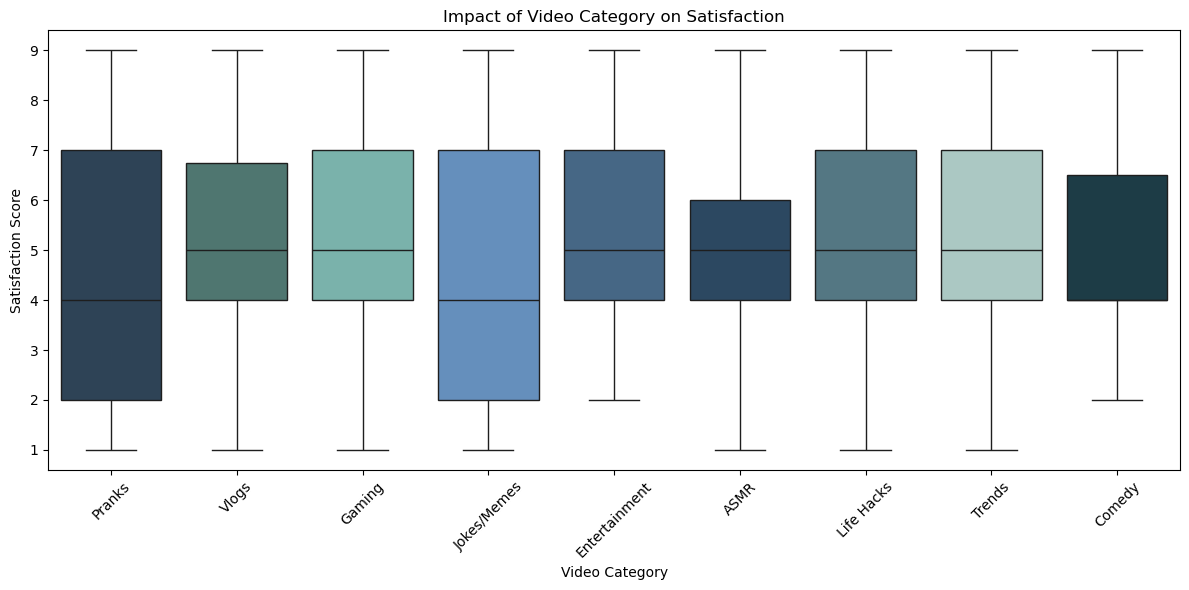

In [91]:
#Visualizing impact of video category on satisfaction (checking for outliers)
plt.figure(figsize=(12, 6))

custom_colors = ['#27445D', '#497D74', '#71BBB2', '#578FCA', '#3B6790', '#23486A', '#4C7B8B', '#A6CDC6', '#16404D']
sns.boxplot(data=clean, x='video_category', y='satisfaction', palette=custom_colors)

plt.title('Impact of Video Category on Satisfaction')
plt.xlabel('Video Category')
plt.ylabel('Satisfaction Score')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

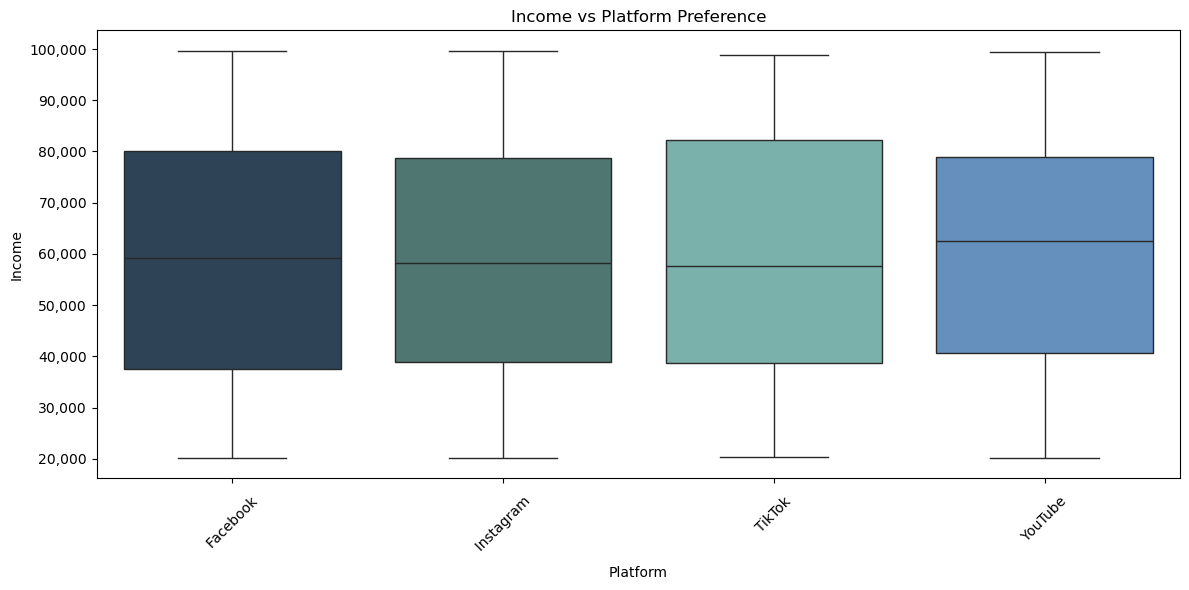

In [92]:
#Visualizing income and platform preference (checking for outliers)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))

# Boxplot
ax = sns.boxplot(data=clean, x='platform', y='income',
                 palette=['#27445D', '#497D74', '#71BBB2', '#578FCA'])

plt.title('Income vs Platform Preference')
plt.xlabel('Platform')
plt.ylabel('Income')  
plt.xticks(rotation=45)

# Format y-axis ticks
def format_y_ticks(x, pos):
    return f'{x:,.0f}'

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_y_ticks))

plt.tight_layout()
plt.show()



# Insights Generated

In [94]:
#Time spent on each platform
total_time_spent = clean.groupby("platform")["total_time_spent"].sum()

In [95]:
#tabulating our results
total_time_spent=total_time_spent.to_frame()

In [98]:
#viewing the results
total_time_spent

,total_time_spent
platform,
Facebook,34295
Instagram,37609
TikTok,41297
YouTube,38205


In [99]:
#sorting the results in ascending order
total_time_spent.sort_values(by="total_time_spent",inplace=True)

In [100]:
#viewing the results
total_time_spent

,total_time_spent
platform,
Facebook,34295
Instagram,37609
YouTube,38205
TikTok,41297


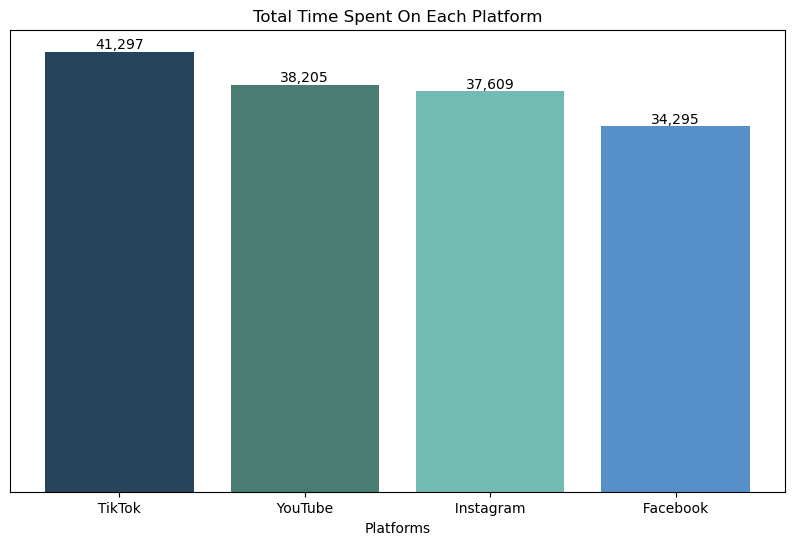

In [101]:
# Sort total_time_spent DataFrame in descending order
total_time_spent_sorted = total_time_spent.sort_values(by="total_time_spent", ascending=False)

# Visualizing total time spent on each platform
plt.figure(figsize=(10, 6))

plt.bar(total_time_spent_sorted.index, total_time_spent_sorted["total_time_spent"], 
        color=['#27445D', '#497D74', '#71BBB2', '#578FCA'])

plt.title("Total Time Spent On Each Platform")
plt.xlabel("Platforms")
plt.ylabel("")
plt.gca().get_yaxis().set_visible(False)

# Data labels without decimals
for i, value in enumerate(total_time_spent_sorted["total_time_spent"]):
    plt.text(i, value + 0.05, f'{value:,.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Save the figure
plt.savefig("total_time_spent_per_platform.png", dpi=300, bbox_inches='tight')

plt.show()


# Findings

Our analysis of total time spent across various platforms reveals a clear ranking of total time spent:

- *TikTok leads in terms of total time spent(41,297 minutes), demonstrating its strong user retention.*

- *YouTube follows closely behind, maintaining significant user attention.*

- *Instagram ranks third, indicating a substantial but relatively lower time spent compared to the first two platforms.*

- *Facebook ranks last in terms of total time spent, highlighting a decline in usage.*

These findings underscore the growing dominance of TikTok and YouTube, while suggesting that platforms like Instagram and Facebook may need to adapt to retain user engagement.

# Recommendations

- *Develop short, engaging, and trend-driven content tailored to *TikTok*, as it holds the highest user time.*
  
- *Also share your TikTok videos on *YouTube Shorts* and *Instagram reels* to reach more people without creating new content.*
  
- *Re-assess content strategies for *Facebook*, potentially focusing on community-oriented or regional content to maintain relevance.*

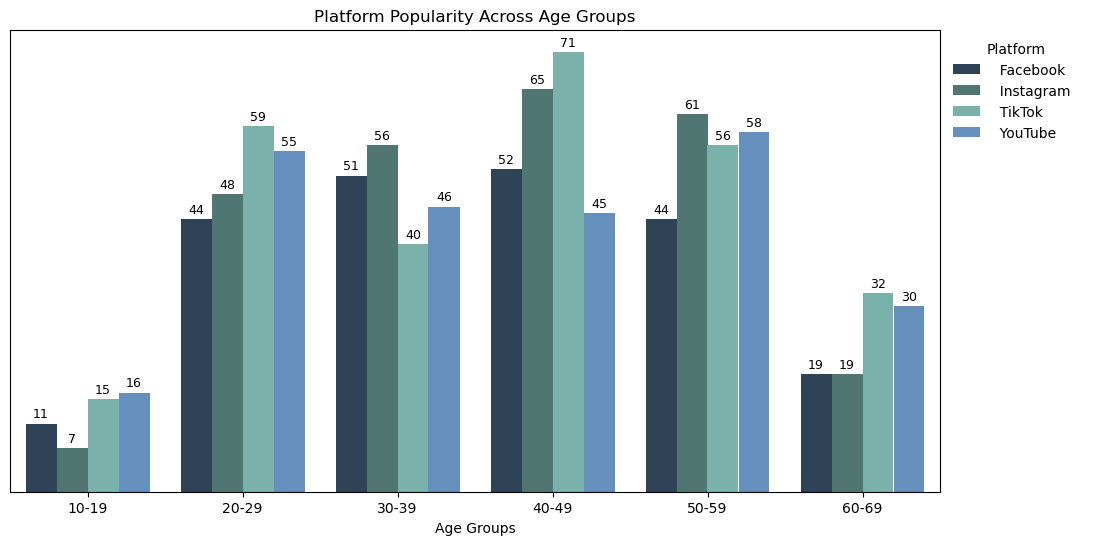

In [114]:
# Create age groups
age_bins = [10, 20, 30, 40, 50, 60, 70]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
clean['age_group'] = pd.cut(clean['age'], bins=age_bins, labels=age_labels, right=False)

# Summarize and sort within each age group
summary = clean.groupby(['age_group', 'platform']).size().reset_index(name='count')
summary_sorted = summary.sort_values(['age_group', 'count'], ascending=[True, False])

# Custom colors
custom_colors = ['#27445D', '#497D74', '#71BBB2', '#578FCA']

plt.figure(figsize=(12, 6))

# Use hue_order to keep platforms in the same consistent color order
plot = sns.barplot(data=summary_sorted, x='age_group', y='count', hue='platform', 
                   palette=custom_colors, hue_order=summary['platform'].unique())

# Add value labels
for container in plot.containers:
    plot.bar_label(container, fontsize=9, padding=2)

# Styling and labels
plt.legend(title='Platform', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.title("Platform Popularity Across Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("")
plt.gca().get_yaxis().set_visible(False)

# Save the figure
plt.savefig("platform_popularity_sorted.png", dpi=300, bbox_inches='tight')
plt.show()


# Findings

- *Age Group 10-19:*
  - *YouTube leads, followed by TikTok, Facebook, and Instagram. This indicates a strong preference for video-based content, with YouTube maintaining a dominant position among younger users.*
  
- *Age Group 20-29:*
  - *TikTok takes the lead, surpassing YouTube, Instagram, and Facebook.* *The rise of TikTok's short-form video content resonates strongly with this age group, which favors quick, engaging content.*
  
- *Age Group 30-39:*
  - *Instagram leads this group, followed by Facebook, YouTube, and TikTok.* *This shift suggests that Instagram's visual and interactive content may appeal more to this demographic, with a noticeable decline in engagement on TikTok.*
  
- *Age Group 40-49:*
  - *TikTok leads this group, followed by Instagram, Facebook, and YouTube. Despite TikTok's younger audience, it is gaining traction across older age groups, with Instagram and Facebook maintaining strong engagement.*
  
- *Age Group 50-59:*
  - *Instagram leads, followed by YouTube, TikTok, and Facebook. This shift highlights a growing preference for Instagram's user-friendly features and image-focused content among middle-aged users, while YouTube continues to capture significant attention.*
  
- *Age Group 60-69:*
  - *TikTok leads this group, closely followed by YouTube, with Facebook and Instagram tied for third place. The popularity of TikTok's easily consumable video content has extended to older users, and YouTube continues to engage this demographic.*

# Recommendations

- *Customize content for each age group’s preferred platform. For example:*

- *Target *10-19 year olds* with fun, interactive content on *YouTube* and *TikTok*.*

- *Use *Instagram* for the *30-39* and *50-59* groups with lifestyle and informational posts.*

- *For *40-49* and *60-69*, mix educational and entertainment on *TikTok* and *YouTube* with larger text and simpler visuals.*

- *Avoid a “one-size-fits-all” strategy—each age group has a unique content behavior pattern.*

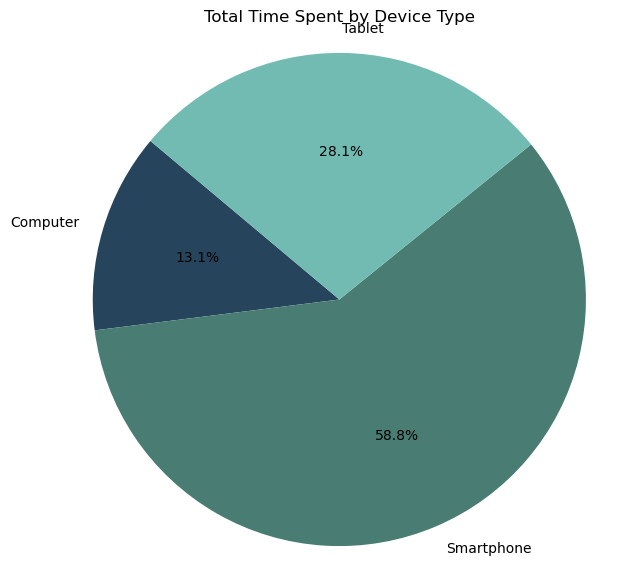

In [119]:
#Plotting total time spent(in percentage) by device type
device_time = clean.groupby('device_type')['total_time_spent'].sum()
custom_colors = ['#27445D', '#497D74', '#71BBB2']

plt.figure(figsize=(7, 7))
plt.pie(device_time, labels=device_time.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)

plt.title('Total Time Spent by Device Type')
plt.axis('equal')
plt.savefig("total_time_spent_by_device_type.png", dpi=300, bbox_inches='tight')

plt.show()

# Findings

Device Type Distribution:
  - *Smartphone* accounts for *58.8%* of the total time spent, showing that mobile devices are the most popular for accessing content. This aligns with the trend of increasing mobile engagement across various platforms. This high percentage is likely due to the portability of mobile phones, allowing users to access content on-the-go, which makes smartphones the most popular device for content consumption.
   
  - *Tablet* follows with *28.1%*, which indicates that tablets also serve as a significant medium for content consumption, though less popular than smartphones.
    
  - *Computer* accounts for *13.1%* of the total time spent, suggesting that while desktops and laptops still hold value, they are less preferred compared to mobile devices for content consumption.

# Recommendations

- *Optimize all visual content, ads, and user interfaces for *smartphones* first.*
                                                        
- *Consider vertical video formats and mobile-responsive designs across platforms.*
    
- *For educational or professional content, include formats that translate well on tablets and computers too.*

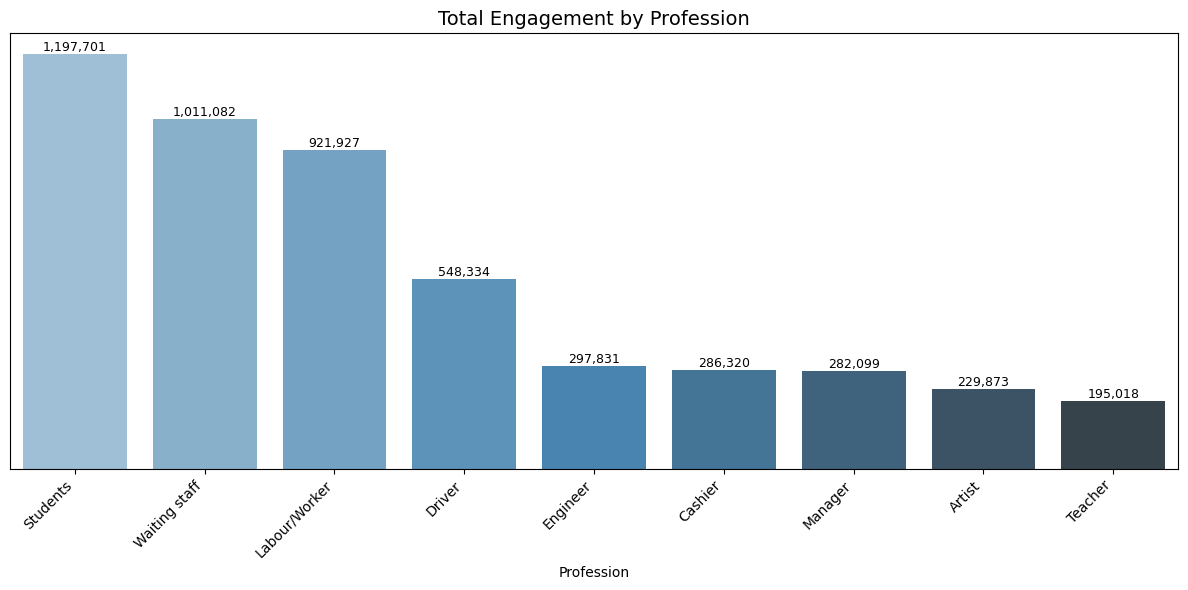

In [126]:
# Group and sort by total engagement per profession (descending)
profession_engagement = clean.groupby("profession")["engagement"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

# Create barplot
ax = sns.barplot(x=profession_engagement.index, y=profession_engagement.values, palette="Blues_d")

# Add value labels without decimals
for i, val in enumerate(profession_engagement.values):
    ax.text(i, val + 0.05, f'{val:,.0f}', ha='center', va='bottom', fontsize=9)

# Style tweaks
ax.yaxis.set_visible(False)
plt.xticks(rotation=45, ha='right')
plt.title("Total Engagement by Profession", fontsize=14)
plt.xlabel("Profession")
plt.ylabel("")
plt.tight_layout()

# Save figure
plt.savefig("total_engagement_by_profession.png", dpi=300, bbox_inches='tight')
plt.show()


# Findings

  - *Students:* 1,078,421 minutes (*17,973 hours* or *17,973 hours and 21 minutes*). The high total engagement reflects the significant time spent on content by students, possibly due to academic purposes, entertainment, and social interactions.
    
  - *Waiting Staff:* 916,652 minutes (*15,277 hours* or *15,277 hours and 32 minutes*). This suggests a strong engagement from waiting staff, possibly due to their varied work schedules and downtime, allowing for significant content consumption.
   
  - *Labour / Worker:* 852,347 minutes (*14,872 hours* or *14,872 hours and 47 minutes*). Workers seem to engage significantly with content, which could be influenced by breaks or commute times.
   
  - *Drivers:* 488,694 minutes (*8,144 hours* or *8,144 hours and 54 minutes*). The driver category shows a moderate level of engagement, likely reflecting the time spent in transit, where mobile devices are commonly used.
   
  - *Engineers:* 263,041 minutes (*4,384 hours* or *4,384 hours and 1 minute*). Engineers show a relatively lower level of engagement compared to other professions, possibly due to more focused work environments.

  - *Managers:* 252,279 minutes (*4,204 hours* or *4,204 hours and 39 minutes*). Managers have moderate engagement, which may be attributed to their work breaks and multitasking habits.

  - *Cashiers:* 231,650 minutes (*3,861 hours* or *3,861 hours and 50 minutes*). Cashiers spend significant time on content, possibly during off-hours or while awaiting customers.

  - *Artists:* 205,023 minutes (*3,417 hours* or *3,417 hours and 23 minutes*). Artists engage with content moderately, possibly using it for inspiration or relaxation.

  - *Teachers:* 185,078 minutes (*3,084 hours* or *3,084 hours and 38 minutes*). Teachers show lower engagement compared to other professions, which may be due to their demanding schedules and responsibilities.

# Recommendations

- *Tailor campaigns to highly engaged professions like *Students* and *Waiting Staff*—consider relatable, humorous, or inspiring narratives.*
    
- *Use data storytelling or behind-the-scenes content to engage creative sectors like *Artists* and *Teachers*.*
    
- *For professionals like *Engineers,* *Drivers,* and *Managers*, consider content that balances utility with entertainment (e.g., tips, motivation, or industry-related infotainment).*

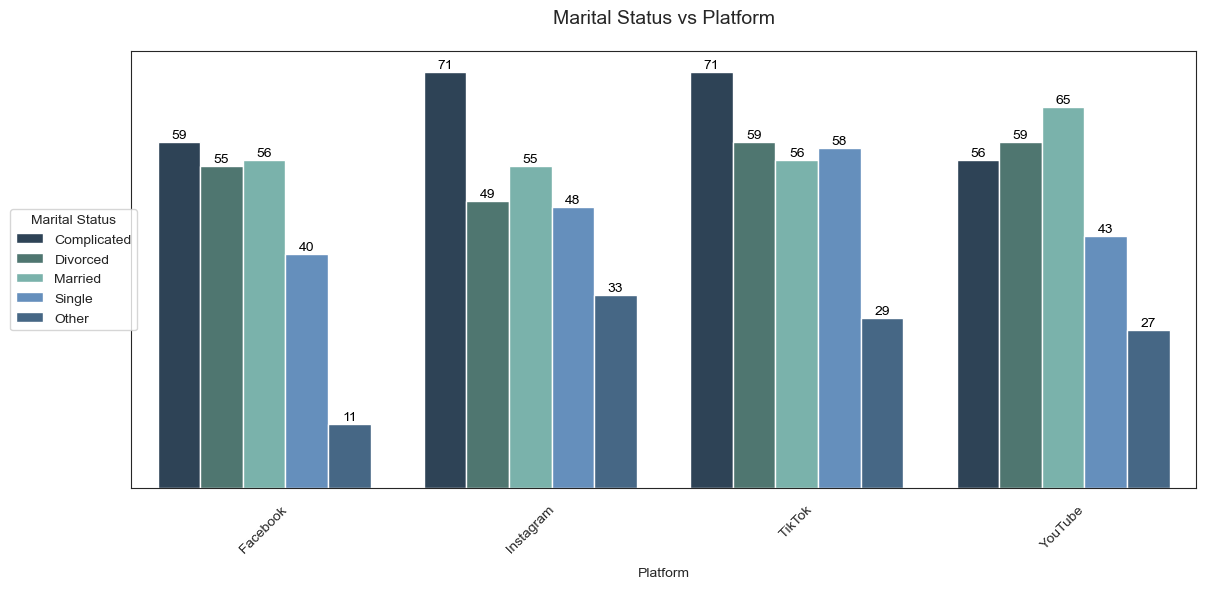

In [132]:
# Visualizing marital status by platform 
custom_colors = ['#27445D', '#497D74', '#71BBB2', '#578FCA', '#3B6790']
sns.set_style("white")

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=clean, x='platform', hue='marital_status', palette=custom_colors, ax=ax)

plt.title('Marital Status vs Platform', fontsize=14, pad=20)

# Legend setup
ax.legend(
    title='Marital Status',
    loc='center left',
    bbox_to_anchor=(-0.12, 0.5), 
    frameon=True
)

# Axis labels and style
plt.xlabel('Platform')
plt.ylabel('')
ax.yaxis.set_visible(False)
plt.xticks(rotation=45)

# Data labels without decimals
for p in ax.patches:
    value = int(p.get_height())
    if value > 0:  # Only annotate non-zero bars
        ax.annotate(f'{value:,}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig("marital_status_and_platform.png", dpi=300, bbox_inches='tight')
plt.show()


# Findings


  - *Instagram* appears to be the unofficial hub for the “It’s Complicated” crowd. With the highest engagement from users in complicated relationships, the platform’s visual and storytelling nature may be providing both an escape and a space for emotional expression. Following closely are Married and Divorced individuals—perhaps using it to document family life or rediscover themselves post-breakup. Single users come in fourth, suggesting Instagram isn’t necessarily the first stop for those flying solo.

  - *Facebook*, once the heart of digital relationships, shows a similar pattern: Complicated leads again, followed by Married, Divorced, and Single. This could reflect Facebook’s deep roots in life events and relationship statuses—users in complex situations may find comfort in nostalgic or supportive connections here.

  - *YouTube* shifts the narrative. Here, Married users dominate the viewership, perhaps using it for family content, DIY, and educational purposes. Divorced and Complicated users follow, suggesting YouTube might serve as a form of learning or healing. Single users engage the least—maybe they’re too busy TikTok-ing?

  - *TikTok* surprises with its top group being Complicated, followed by Divorced, Single, and lastly Married. This highlights that TikTok appeals to emotionally expressive and transitional phases—where memes, dance challenges, and relatable skits serve as a coping mechanism or a form of entertainment that resonates deeply.

 *Key Takeaway:* Platforms like Instagram, Facebook, and TikTok seem to attract users navigating emotional complexity (Complicated and Divorced), while YouTube becomes more of a stable go-to for Married users seeking functional or family-focused content.

# Recommendations

- *Use platform-specific campaigns aligned with dominant user relationship status:*
    
- *For *Instagram* and *Facebook* (with many in "Complicated" or "Married" statuses), build relationship-focused or emotional content.*
    
- *For *TikTok*, lean into humor and trends that appeal to *Complicated/Single* users.*

- *For *YouTube*, where *Married* users dominate, introduce lifestyle or family-based content themes.*

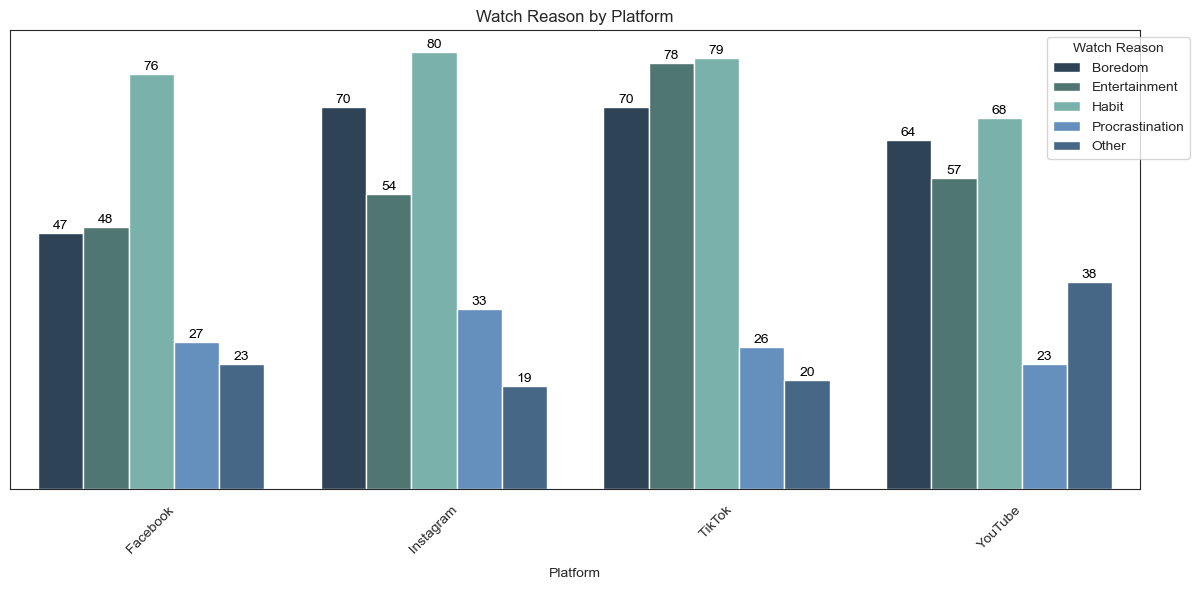

In [138]:
#Visualizing watch reason by platform
custom_colors = ['#27445D', '#497D74', '#71BBB2', '#578FCA', '#3B6790', '#23486A', '#4C7B8B', '#A6CDC6', '#16404D']

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=clean, x='platform', hue='watch_reason', palette=custom_colors)

plt.title('Watch Reason by Platform')
plt.xlabel('Platform')
plt.ylabel('') 
plt.xticks(rotation=45)

for p in ax.patches:
    value = int(p.get_height())
    if value > 0:
        ax.annotate(f'{value:,}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

ax.get_yaxis().set_visible(False)

ax.legend(
    title='Watch Reason',
    loc='upper right',
    bbox_to_anchor=(1.05, 1), 
    frameon=True
)

plt.tight_layout()
plt.savefig("watch_reason_by_platform.png", dpi=300, bbox_inches='tight')
plt.show()

# Findings

- *Reasons for Watching by Platform:*

  - *Instagram* users primarily cited *Habit* as the main driver of usage, closely followed by *Boredom*, *Entertainment*, and *Procrastination*. This shows that Instagram has become a reflex scroll—something users check without much thought, especially during idle moments. It blends visual aesthetics with short-form content that users consume almost passively.

  - *Facebook* users also lean into *Habit*, but what’s interesting is that *Entertainment* overtakes *Boredom* here. This could suggest that Facebook’s curated videos, memes, and sentimental content keep users engaged more actively, especially those who use it to follow pages or communities. Still, *Procrastination* lingers as the final nudge.

  - *YouTube* follows a near-identical pattern to Instagram: *Habit*, *Boredom*, *Entertainment*, and *Procrastination*. This suggests YouTube has become a go-to background app or “default” content space. The presence of long-form videos may be giving users something to do during slow hours—or when actively avoiding tasks.

  - *TikTok* users lead with *Habit* and *Entertainment*—a clear sign of its addictive algorithm and endless scroll. *Boredom* follows, then *Procrastination*, which makes sense given TikTok’s quick-fire content. It's not just a way to pass time—it’s a whole alternate universe users dip into for laughs, trends, or emotional relatability.

 *Key Insight:* Across all platforms, *Habit* is the dominant driver—suggesting strong user attachment and routine behavior. However, *Entertainment* and *Boredom* shuffle positions across platforms, showing subtle differences in how users perceive the value of each. Whether it’s escaping chores or riding the algorithm wave, each platform feeds a different flavor of “delay mode.”

# Recommendations

- *Create content that taps into *habitual behaviors*—daily series, countdowns, or quick formats.*
  
- *Infuse *entertainment* into learning or promotions to hold attention and reduce bounce.*
 
- *Use platform-specific tone: lighthearted and quirky for TikTok, aesthetic for IG, deeper storytelling on YouTube, and community vibes on Facebook.*

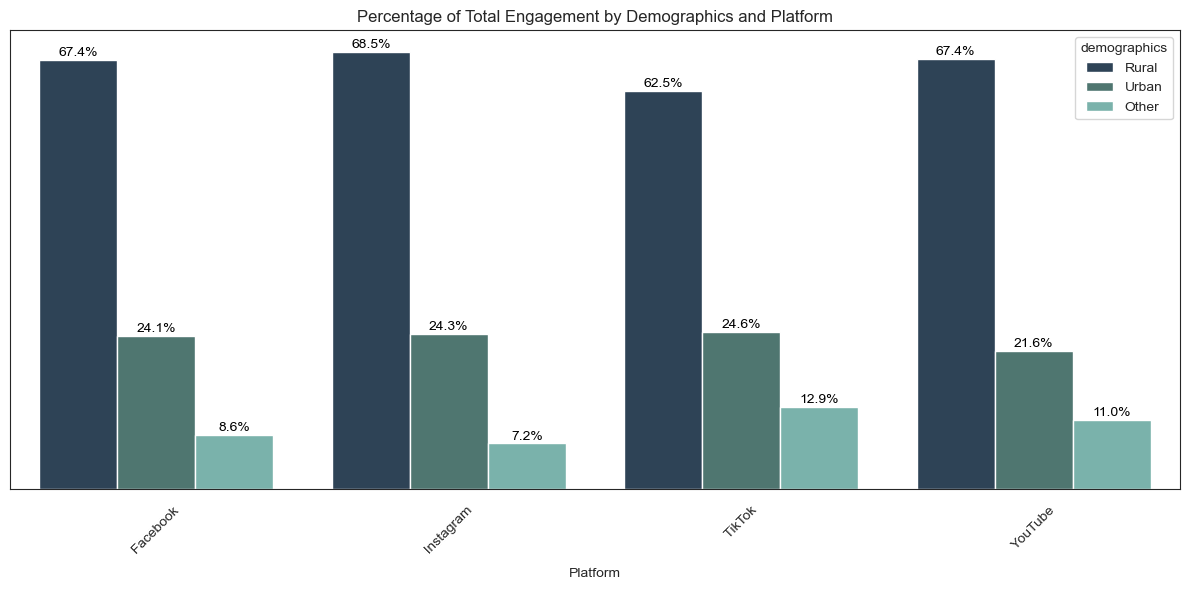

In [144]:
#Visualizing percentage of total engagement by demographics and platforms
filtered = clean.dropna(subset=['platform', 'demographics', 'engagement'])
total_engagement = filtered.groupby(['platform', 'demographics'])['engagement'].sum().reset_index()

total_per_platform = total_engagement.groupby('platform')['engagement'].transform('sum')
total_engagement['Percentage'] = (total_engagement['engagement'] / total_per_platform) * 100

custom_colors = ['#27445D', '#497D74', '#71BBB2', '#578FCA', '#3B6790', '#23486A', '#4C7B8B', '#A6CDC6', '#16404D']

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=total_engagement,
    x='platform',
    y='Percentage',
    hue='demographics',
    palette=custom_colors
)

plt.title('Percentage of Total Engagement by Demographics and Platform')
plt.xlabel('Platform')
plt.ylabel('')
plt.xticks(rotation=45)
ax.get_yaxis().set_visible(False)

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig("engagement_by_demo_and_platform.png", dpi=300, bbox_inches='tight')
plt.show()

# Findings

*Key Insight:*  
Despite the widespread belief that digital platform usage is more dominant in urban areas, our findings reveal quite the opposite. *Rural communities consistently lead in total engagement across all major platforms*. From Facebook to TikTok and even YouTube, rural users are clocking more screen time than their urban counterparts.

This could point to several factors—fewer alternative entertainment options, a stronger reliance on mobile devices, or even the rise of smartphone penetration in rural settings. *Whatever the case, the digital wave is alive and thriving beyond the cities—and that’s a powerful insight for marketers, content creators, and platform strategists alike.*

Rural Ghana isn’t just connected—it’s *engaged*.

# Recommendations

- *Don’t overlook rural markets—develop content localized in language, culture, and relevance.*

- *Partner with influencers or creators in rural areas to boost relatability.*

- *Ensure mobile-friendly and *low-data usage formats* to meet the rural audience’s tech constraints.*

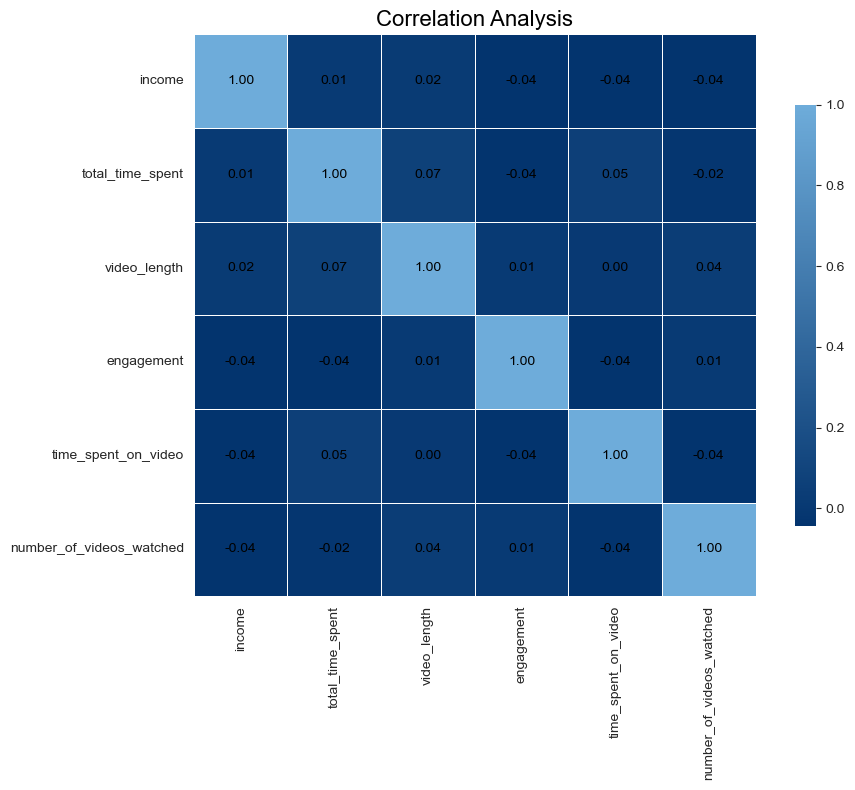

In [150]:
#finding the correlation betweenn our numerical columns
from matplotlib.colors import LinearSegmentedColormap

# Select numeric columns only
numeric_cols = clean.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create a custom colormap from 03346E to 6EACDA
custom_cmap = LinearSegmentedColormap.from_list('custom_blue', ['#03346E', '#6EACDA'])

# Plot the heatmap with the custom colormap
sns.heatmap(corr_matrix, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.75}, annot_kws={'size': 10, 'color': 'black'})

# Title and layout
plt.title('Correlation Analysis', fontsize=16, color='black')
plt.tight_layout()

plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


# Findings

*From the illustration above, we can conclude that the variables have no correlation with each other, thus, a change in one does not affect the other.*

# Machine Learning

In [155]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   user_id                   1000 non-null   object  
 1   age                       1000 non-null   object  
 2   gender                    1000 non-null   category
 3   income                    1000 non-null   int64   
 4   profession                1000 non-null   object  
 5   demographics              1000 non-null   category
 6   platform                  1000 non-null   category
 7   total_time_spent          1000 non-null   int64   
 8   video_category            1000 non-null   object  
 9   video_length              1000 non-null   int64   
 10  engagement                1000 non-null   float64 
 11  time_spent_on_video       1000 non-null   int64   
 12  number_of_videos_watched  1000 non-null   int64   
 13  frequency                 1000 non-null   category
 14

In [157]:
#changing the datatypes
clean["gender"] = clean["gender"].astype("object")
clean["age"] = clean["age"].astype("int64")
clean["addiction_level"] = clean["addiction_level"].astype("category")


In [159]:
#defining our input & output(x & y)
X=clean[["age","gender","income","profession","total_time_spent","time_spent_on_video","number_of_videos_watched"]]

y=clean['addiction_level']

In [161]:
#encoding
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Features we want to use
features = ["age","gender","income","profession","total_time_spent","time_spent_on_video","number_of_videos_watched"]

# Separate X and y
X = clean[features]
y = clean['addiction_level']  # Target variable

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

# Apply One Hot Encoding
X_encoded = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

# Confirm all numeric data now
print(X_encoded.dtypes)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Check shape
print(X_train.shape, X_test.shape)


Non-numeric columns: ['gender', 'profession']
age                         int64
income                      int64
total_time_spent            int64
time_spent_on_video         int64
number_of_videos_watched    int64
gender_Male                  bool
gender_Other                 bool
profession_Cashier           bool
profession_Driver            bool
profession_Engineer          bool
profession_Labour/Worker     bool
profession_Manager           bool
profession_Students          bool
profession_Teacher           bool
profession_Waiting staff     bool
dtype: object
(800, 15) (200, 15)


In [163]:
# 1. Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [164]:
#model evaluation
from sklearn.metrics import accuracy_score, classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.03      0.03        37
           1       0.00      0.00      0.00         8
           2       0.27      0.54      0.35        41
           3       0.11      0.09      0.10        33
           4       0.00      0.00      0.00         6
           5       0.23      0.26      0.24        47
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        18

    accuracy                           0.19       200
   macro avg       0.08      0.11      0.09       200
weighted avg       0.13      0.19      0.15       200



In [167]:
#bringing out the accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.19


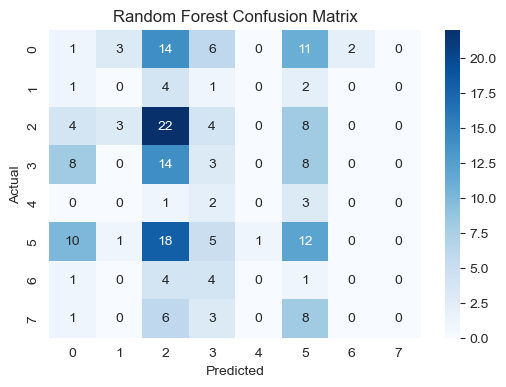

In [169]:
#visualizing the random forest model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


_The accuracy score for the random forest model is 0.19_

In [172]:
#checking an imbalance
clean['addiction_level'].value_counts()


addiction_level
2    248
5    228
0    180
3    159
1     60
7     55
4     36
6     34
Name: count, dtype: int64

In [174]:
# 2. K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [176]:
# model evaluation
from sklearn.metrics import accuracy_score, classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.24      0.20        37
           1       0.00      0.00      0.00         8
           2       0.16      0.22      0.18        41
           3       0.15      0.15      0.15        33
           4       0.00      0.00      0.00         6
           5       0.24      0.21      0.22        47
           6       0.00      0.00      0.00        10
           7       0.50      0.06      0.10        18

    accuracy                           0.17       200
   macro avg       0.15      0.11      0.11       200
weighted avg       0.19      0.17      0.16       200



In [178]:
#bringing out the accuracy score
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print accuracy
print("KNN Accuracy Score:", accuracy_knn)


KNN Accuracy Score: 0.17


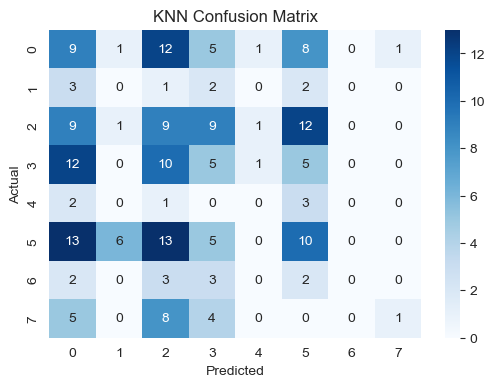


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.24      0.20        37
           1       0.00      0.00      0.00         8
           2       0.16      0.22      0.18        41
           3       0.15      0.15      0.15        33
           4       0.00      0.00      0.00         6
           5       0.24      0.21      0.22        47
           6       0.00      0.00      0.00        10
           7       0.50      0.06      0.10        18

    accuracy                           0.17       200
   macro avg       0.15      0.11      0.11       200
weighted avg       0.19      0.17      0.16       200



In [180]:
#visualizing our accuracy score

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for KNN
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))


_The accuracy score while using the KNN model is 0.17_

In [183]:
#using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [185]:
# Make predictions
y_pred_dt = dt.predict(X_test)

# Calculate accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy Score:", accuracy_dt)



Decision Tree Accuracy Score: 0.175


_The Decision Tree Accuracy Score is 0.175_

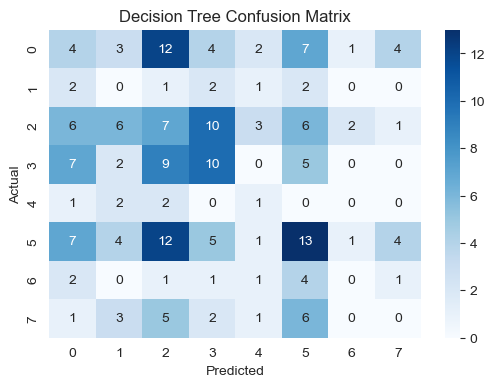

In [188]:
# Generate confusion matrix(visualization)

cm_dt = confusion_matrix(y_test, y_pred_dt)
# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [194]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_dt = accuracy_score(y_test, y_pred_dt)


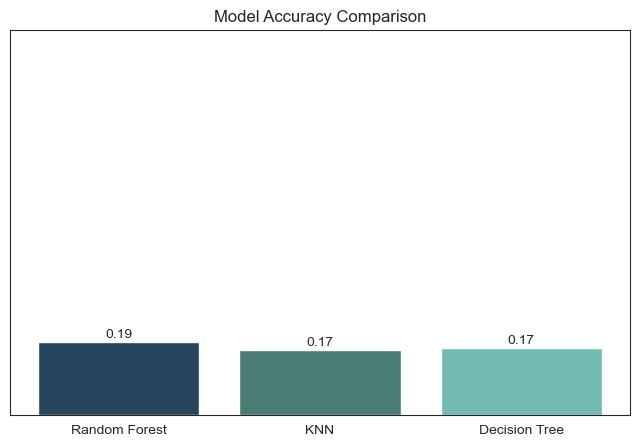

In [203]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['Random Forest', 'KNN', 'Decision Tree']
accuracies = [accuracy_rf, accuracy_knn, accuracy_dt]

# Create the bar chart
plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['#27445D', '#497D74', '#71BBB2'])

# Add chart details
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # keep the y-axis range between 0 and 1

# Remove Y-axis label
plt.gca().axes.get_yaxis().set_visible(False)

# Add the accuracy values on top of the bars
for i in range(len(accuracies)):
    plt.text(i, accuracies[i]+0.01, f"{accuracies[i]:.2f}", ha='center')

plt.savefig('model_accuracy_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


_Upon analysis of the accuracy scores of the three models, Random Forest gave a relatively higher accuracy score, thus, we suggest this model in the prediction of addiction level_

# Conclusion

Our analysis of social media usage across Ghana reveals rich insights into user behavior, preferences, and engagement patterns. Key findings highlight TikTok's dominance in total watch time, the varying platform preferences by age, profession, and marital status, and the surprisingly high rural engagement across all platforms.

These insights provide a powerful foundation for organizations, content creators, and digital marketers to make data-driven decisions. By aligning strategies with these trends — such as focusing on short-form video content, targeting specific age groups, or tailoring content for rural audiences — stakeholders can enhance their impact and reach.

As data continues to evolve, future research should explore real-time patterns, emerging platforms, and deeper behavioral motivations to stay ahead of the curve in this dynamic digital space.

In [ ]:
#saving our document
clean.to_csv("social_media_final.csv", index=False)